In [1]:
#Importing important libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import csv
import random
from collections import Counter

In [2]:
#Specifying the path of the given file
path = r"sna2.txt"
print(path)

sna2.txt


In [3]:
#Adding edges in a data structure for construction of graph
edges=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    edges.append(words)
edges

[['24325', '24394'],
 ['24325', '40517'],
 ['24325', '58507'],
 ['24394', '3737'],
 ['24394', '3905'],
 ['24394', '7237'],
 ['24394', '12715'],
 ['24394', '13648'],
 ['24394', '13659'],
 ['24394', '13664'],
 ['24394', '14304'],
 ['24394', '14823'],
 ['24394', '17370'],
 ['24394', '18956'],
 ['24394', '19615'],
 ['24394', '19660'],
 ['24394', '21669'],
 ['24394', '23106'],
 ['24394', '24325'],
 ['24394', '24832'],
 ['24394', '26021'],
 ['24394', '26363'],
 ['24394', '28240'],
 ['24394', '35376'],
 ['24394', '35424'],
 ['24394', '36383'],
 ['24394', '36860'],
 ['24394', '37616'],
 ['24394', '37932'],
 ['24394', '39984'],
 ['24394', '41687'],
 ['24394', '44934'],
 ['24394', '48192'],
 ['24394', '51464'],
 ['24394', '55079'],
 ['24394', '58507'],
 ['24394', '59077'],
 ['24394', '59471'],
 ['24394', '59870'],
 ['24394', '61742'],
 ['24394', '61796'],
 ['24394', '62227'],
 ['24394', '65346'],
 ['24394', '66689'],
 ['24394', '67851'],
 ['24897', '30545'],
 ['24897', '42653'],
 ['42653', '1182

In [4]:
#Graph creation using the edges and networkX library
G=nx.read_edgelist(path,nodetype=int,create_using=nx.Graph())

In [5]:
print("No. of Nodes:",nx.number_of_nodes(G))


No. of Nodes: 9877


In [6]:
print("No. of Edges:",nx.number_of_edges(G))


No. of Edges: 25998


In [7]:
#Finding the nature of Graph
if(G.is_directed()):
  print("Type: Directed")
else:
  print("Type: Undirected")

Type: Undirected


In [8]:
#Finding the degree of each node in the Graph
degrees = [degree for node, degree in G.degree()]

In [9]:
#Finding the basic network Structure Statistics
max_degree = max(degrees)
min_degree = min(degrees)
avg_degree = np.mean(degrees)
std_dev_degree = np.std(degrees)

In [10]:
print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {avg_degree}")
print(f"Standard Deviation of Degree Distribution: {std_dev_degree}")


Max Degree: 65
Min Degree: 1
Average Degree: 5.264351523742027
Standard Deviation of Degree Distribution: 6.191281041648168


In [11]:
degree_dist = nx.degree_histogram(G)
degree_counts = Counter(degree_dist)
degreess = list(degree_counts.keys())
counts = list(degree_counts.values())

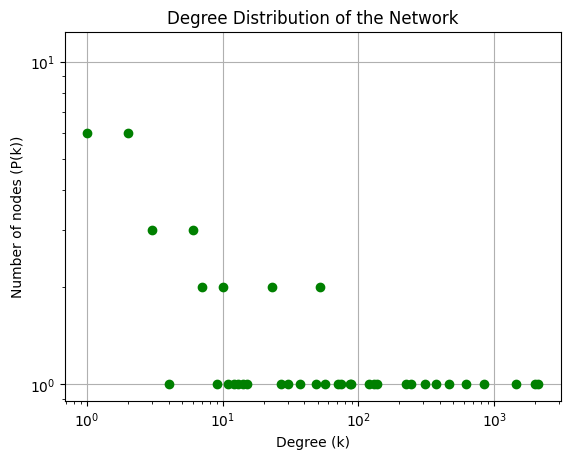

In [12]:
# Plot the degree distribution on a log-log scale
plt.loglog(degreess, counts, marker='o',  linestyle='', color='g')
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes (P(k))")
plt.title("Degree Distribution of the Network")
plt.grid(True)
plt.show()


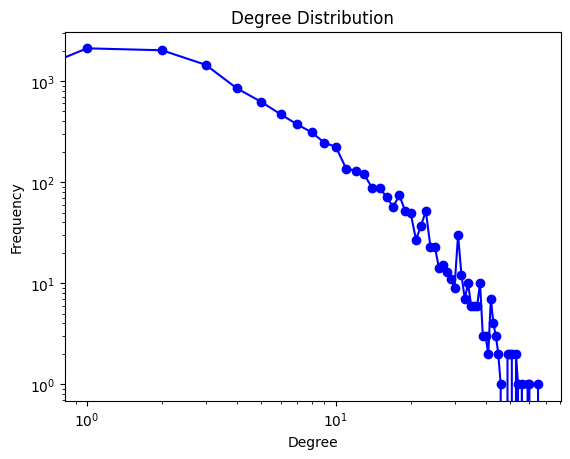

In [13]:
#Plotting Frequency vs Degree Plot 
deg = G.degree()
degree_freq = nx.degree_histogram(G)
plt.loglog(degree_freq,'b-',marker = 'o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [14]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
mean_degree_centrality = sum(degree_centrality.values()) / len(degree_centrality)
print(f"\nMean Degree Centrality: {mean_degree_centrality}")
print()
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

Degree Centrality:

Mean Degree Centrality: 0.000533044909248889

Node 24325: 0.0003037667071688943
Node 24394: 0.004252733900364521
Node 40517: 0.0049615228837586066
Node 58507: 0.0006075334143377886
Node 3737: 0.0022276225192385582
Node 3905: 0.0001012555690562981
Node 7237: 0.0004050222762251924
Node 12715: 0.0013163223977318754
Node 13648: 0.005062778452814905
Node 13659: 0.000911300121506683
Node 13664: 0.001012555690562981
Node 14304: 0.0006075334143377886
Node 14823: 0.002632644795463751
Node 17370: 0.004050222762251924
Node 18956: 0.0034426893479141355
Node 19615: 0.006075334143377886
Node 19660: 0.003037667071688943
Node 21669: 0.0031389226407452413
Node 23106: 0.0015188335358444715
Node 24832: 0.0004050222762251924
Node 26021: 0.0019238558120696638
Node 26363: 0.000911300121506683
Node 28240: 0.0019238558120696638
Node 35376: 0.0003037667071688943
Node 35424: 0.003645200486026732
Node 36383: 0.003341433778857837
Node 36860: 0.004151478331308222
Node 37616: 0.00243013365735115

In [15]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
print("\nEigenvector Centrality:")
mean_eigenvector_centrality = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
print(f"\nMean Eigenvector Centrality: {mean_eigenvector_centrality}")
print()
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")


Eigenvector Centrality:

Mean Eigenvector Centrality: 0.000599678836872252

Node 24325: 5.8226616294233765e-06
Node 24394: 5.424936163083605e-05
Node 40517: 7.119337724762459e-05
Node 58507: 1.4323258477380834e-05
Node 3737: 4.637756690361692e-05
Node 3905: 2.353924547093179e-06
Node 7237: 4.116001456694521e-06
Node 12715: 1.4134552983803813e-05
Node 13648: 6.321799824860528e-05
Node 13659: 1.883082071653648e-05
Node 13664: 8.393115123870136e-06
Node 14304: 6.657729535701645e-06
Node 14823: 4.471373607084237e-05
Node 17370: 3.268519132742225e-05
Node 18956: 5.4761181367216194e-05
Node 19615: 7.844158742609398e-05
Node 19660: 4.325434707537676e-05
Node 21669: 5.939318363180867e-05
Node 23106: 1.3438212578161697e-05
Node 24832: 6.863872167241085e-06
Node 26021: 2.7630709964222213e-05
Node 26363: 5.381301347017014e-06
Node 28240: 1.921474771743517e-05
Node 35376: 2.5409285725666375e-06
Node 35424: 5.3822756239249256e-05
Node 36383: 1.99100731379726e-05
Node 36860: 6.594266135814498e-05
N

In [16]:
# Clustering Coefficients (Local)
local_clustering = nx.clustering(G)
print("\nLocal Clustering Coefficients:")
for node, clustering in local_clustering.items():
    print(f"Node {node}: {clustering}")



Local Clustering Coefficients:
Node 24325: 0.3333333333333333
Node 24394: 0.09407665505226481
Node 40517: 0.07993197278911565
Node 58507: 0.26666666666666666
Node 3737: 0.24242424242424243
Node 3905: 0
Node 7237: 0.5
Node 12715: 0.2948717948717949
Node 13648: 0.08979591836734693
Node 13659: 0.3611111111111111
Node 13664: 0.3111111111111111
Node 14304: 0.26666666666666666
Node 14823: 0.08307692307692308
Node 17370: 0.0782051282051282
Node 18956: 0.13012477718360071
Node 19615: 0.06610169491525424
Node 19660: 0.12183908045977011
Node 21669: 0.13763440860215054
Node 23106: 0.10476190476190476
Node 24832: 0.3333333333333333
Node 26021: 0.21052631578947367
Node 26363: 0.08333333333333333
Node 28240: 0.21052631578947367
Node 35376: 0.3333333333333333
Node 35424: 0.12222222222222222
Node 36383: 0.07575757575757576
Node 36860: 0.11341463414634147
Node 37616: 0.09782608695652174
Node 37932: 0.16842105263157894
Node 39984: 0.2777777777777778
Node 41687: 0.07657657657657657
Node 44934: 0.1142857

In [17]:
# Global Clustering Coefficient
global_clustering = nx.average_clustering(G)
print(f"\nGlobal Clustering Coefficient: {global_clustering}")


Global Clustering Coefficient: 0.47143905296693295


In [18]:
# Reciprocity
reciprocity = nx.reciprocity(G)
print(f"\nReciprocity: {reciprocity}")


Reciprocity: 0.0


In [19]:
# Transitivity
transitivity = nx.transitivity(G)
print(f"Transitivity: {transitivity}")

Transitivity: 0.2839996525875546


In [20]:
# PageRank Centrality
pagerank_centrality = nx.pagerank(G)
print("\nPageRank Centrality:")
for node, centrality in pagerank_centrality.items():
    print(f"Node {node}: {centrality}")


PageRank Centrality:
Node 24325: 4.838798682832483e-05
Node 24394: 0.0005166400166370325
Node 40517: 0.0005844722606860078
Node 58507: 9.043407986702065e-05
Node 3737: 0.00023466347282000903
Node 3905: 2.559761485401913e-05
Node 7237: 7.544270624373445e-05
Node 12715: 0.00015091725259806272
Node 13648: 0.0005654560807764005
Node 13659: 0.00012454105057399905
Node 13664: 0.00015633511226485877
Node 14304: 9.474213287624868e-05
Node 14823: 0.0003559858040568585
Node 17370: 0.0004968793655747496
Node 18956: 0.00038452212821557297
Node 19615: 0.0007749092455548481
Node 19660: 0.0003608554622555084
Node 21669: 0.00034106891066124176
Node 23106: 0.00023159821085093536
Node 24832: 5.5699728964201844e-05
Node 26021: 0.00021726692407474828
Node 26363: 0.0001573261515889489
Node 28240: 0.00025271013291069825
Node 35376: 5.801295624111299e-05
Node 35424: 0.000417150644055066
Node 36383: 0.0005007349387434494
Node 36860: 0.000448752873919793
Node 37616: 0.0003538101707701471
Node 37932: 0.0002417

In [21]:
from igraph import Graph

# Create igraph graph from NetworkX graph
igraph_graph = Graph.TupleList(nx.to_edgelist(G), directed=False)

In [22]:
betweenness_centrality = igraph_graph.betweenness()
print("\nBetweenness Centrality:")
for node_id, centrality_value in enumerate(betweenness_centrality):
    print(f"Node {node_id}: {centrality_value}")


Betweenness Centrality:
Node 0: 621.1475326318821
Node 1: 582307.8599661697
Node 2: 294041.2464350674
Node 3: 9904.707695481877
Node 4: 26537.374400343055
Node 5: 0.0
Node 6: 8636.0
Node 7: 22344.187942056506
Node 8: 493512.1250133624
Node 9: 29914.91907403018
Node 10: 47881.229959362165
Node 11: 9275.484052720958
Node 12: 212101.30121215413
Node 13: 453233.2937858502
Node 14: 173426.62040065724
Node 15: 1037806.9210732187
Node 16: 108045.9020134877
Node 17: 201253.64678412667
Node 18: 51900.754140915196
Node 19: 280.7929772103064
Node 20: 67999.50602785447
Node 21: 105408.81808316319
Node 22: 54485.6762462082
Node 23: 10516.943088438336
Node 24: 245685.29921297292
Node 25: 488837.4386546233
Node 26: 236612.93958751977
Node 27: 341507.28494692163
Node 28: 120469.58397994327
Node 29: 43629.547712282096
Node 30: 369076.8253064261
Node 31: 209733.8244589776
Node 32: 233373.7158174173
Node 33: 86779.27591245007
Node 34: 80956.95285806502
Node 35: 359244.3392333756
Node 36: 149577.16569930

In [23]:
closeness_centrality = igraph_graph.closeness()

# Print node IDs and their closeness centrality values
print("\nCloseness Centrality:")
for node_id, centrality_value in enumerate(closeness_centrality):
    print(f"Node {node_id}: {centrality_value}")



Closeness Centrality:
Node 0: 0.20198783910196444
Node 1: 0.24113574180579597
Node 2: 0.23121402757328335
Node 3: 0.21339625438553145
Node 4: 0.221319666880205
Node 5: 0.1942907274935889
Node 6: 0.19598810955546983
Node 7: 0.21993328410277305
Node 8: 0.2383870166432061
Node 9: 0.2140944920926082
Node 10: 0.21240962077615463
Node 11: 0.20197366882585413
Node 12: 0.22912853163549543
Node 13: 0.23865049321654555
Node 14: 0.23583540398110478
Node 15: 0.24716689560439561
Node 16: 0.22312640471208245
Node 17: 0.2373454245671888
Node 18: 0.21278640059127865
Node 19: 0.20030148423005567
Node 20: 0.22225367334860144
Node 21: 0.20452285105375326
Node 22: 0.22017997807632497
Node 23: 0.1965992898115269
Node 24: 0.2320027935962179
Node 25: 0.22458266160486764
Node 26: 0.23509077547020876
Node 27: 0.219636862984437
Node 28: 0.2209855695425238
Node 29: 0.21827141774071265
Node 30: 0.23742371763153555
Node 31: 0.23527008253656942
Node 32: 0.22834104428288168
Node 33: 0.22214506172839507
Node 34: 0.2

In [24]:
import igraph as ig
nodes = list(set([node for edge in edges for node in edge]))
node_index_map = {node: index for index, node in enumerate(nodes)}
edges = [(node_index_map[edge[0]], node_index_map[edge[1]]) for edge in edges]
adjacency_list = {node_index: [] for node_index in range(len(nodes))}
for edge in edges:
    adjacency_list[edge[0]].append(edge[1])

In [25]:
katz_centrality = np.ones(len(nodes))
alpha = 0.85 
max_iterations = 100
tolerance = 1e-6

for _ in range(max_iterations):
    prev_katz_centrality = katz_centrality.copy()
    for node_index in range(len(nodes)):
        sum_score = sum(prev_katz_centrality[neighbor] for neighbor in adjacency_list[node_index])
        katz_centrality[node_index] = 1 + alpha * sum_score
    if np.sum(np.abs(prev_katz_centrality - katz_centrality)) < tolerance:
        break

In [26]:
# Katz Centrality
for i, score in enumerate(katz_centrality):
    print(f"Node {nodes[i]}: Katz Centrality = {score}")

Node 6777: Katz Centrality = 1.3869840098750671e+136
Node 58685: Katz Centrality = 1.6623415839677992e+138
Node 60295: Katz Centrality = 2.491794953186038e+137
Node 17817: Katz Centrality = 8.380677923956846e+136
Node 22035: Katz Centrality = 9.630073920829262e+135
Node 37957: Katz Centrality = 1.3418934456978754e+134
Node 13763: Katz Centrality = 7.41697005582471e+40
Node 41420: Katz Centrality = 2.5833553039855256e+36
Node 65230: Katz Centrality = 6.666666170965159
Node 49300: Katz Centrality = 1.2432111162028187e+134
Node 42925: Katz Centrality = 2.376360037386055e+135
Node 40327: Katz Centrality = 7.773988514191587e+136
Node 40292: Katz Centrality = 2.1099936608191264e+135
Node 18882: Katz Centrality = 2.771057732609939e+136
Node 49600: Katz Centrality = 1.5247516626442483e+138
Node 9574: Katz Centrality = 6.456380792891533e+134
Node 52565: Katz Centrality = 8.603672158244621e+26
Node 5764: Katz Centrality = 2.9915969443731923e+137
Node 8509: Katz Centrality = 4.464705529149922e+13